In [1]:
%matplotlib inline
from simulation import *
#from scipy.special import comb
import numpy as np

In [2]:
def findSet2(myG,myCenterNode,myMaxDeg):
    curSet = set()
    curDeg = myMaxDeg
    while(curDeg>0):
        tempoSet = set(findNeighDegN(myG,myCenterNode,curDeg))
        curSet = curSet.union(tempoSet)
        curDeg -= 1
    return curSet

Generating mGraph
----- DONE
Getting layout
----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [19, 14, 17, 28, 33] 
Slist :  [33]


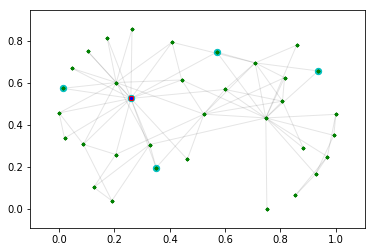

Starting infection


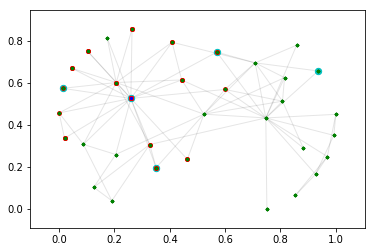

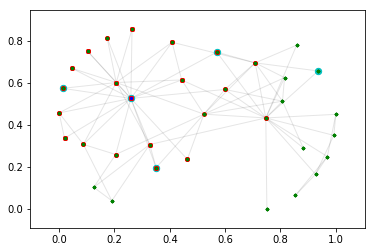

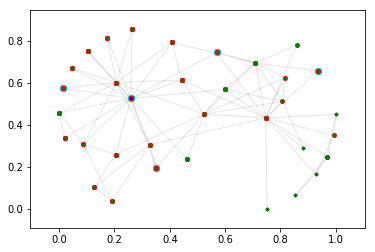

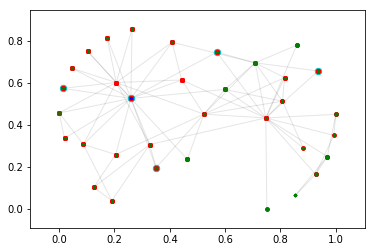

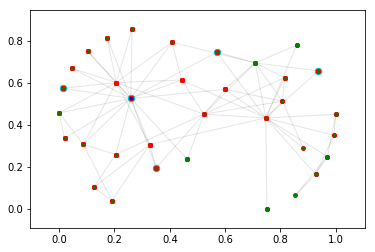

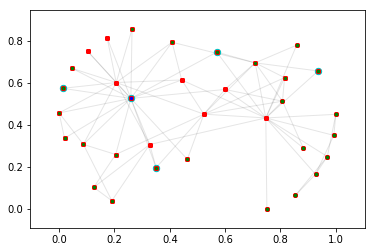

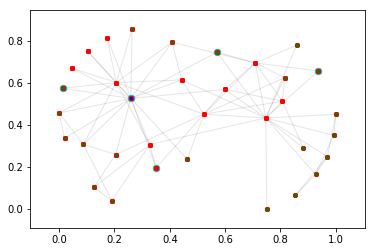

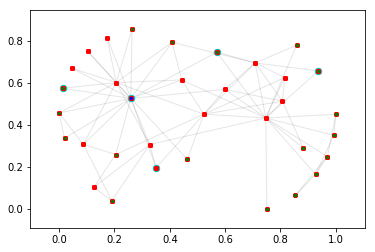

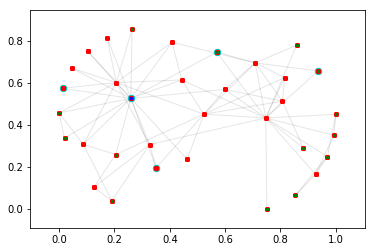

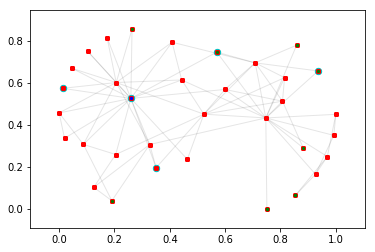

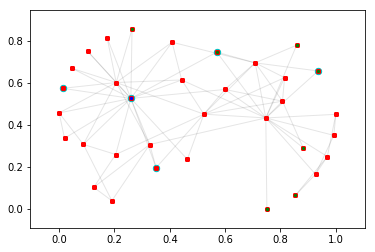

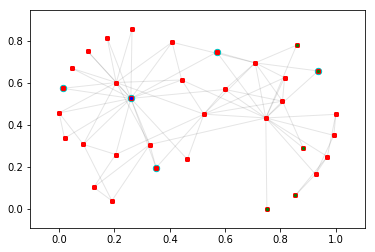

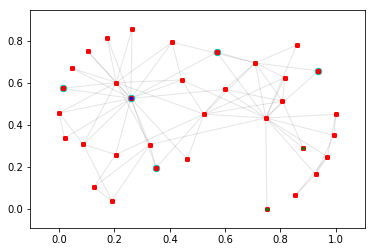

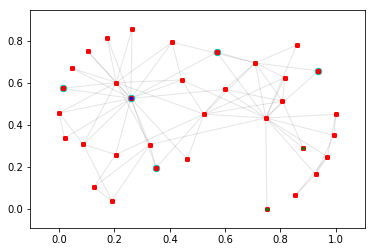

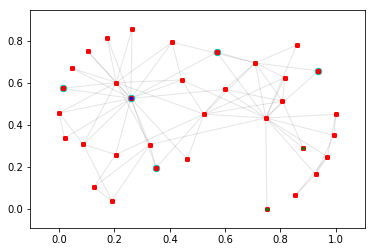

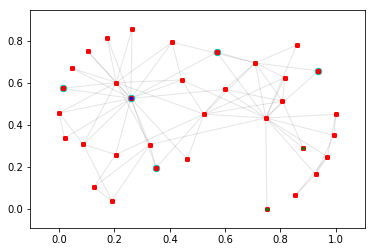

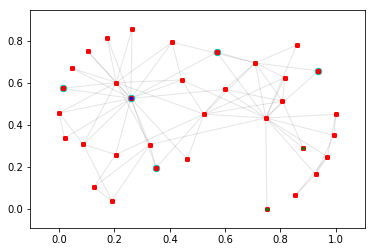

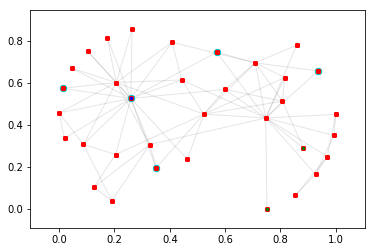

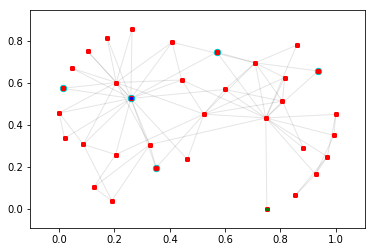

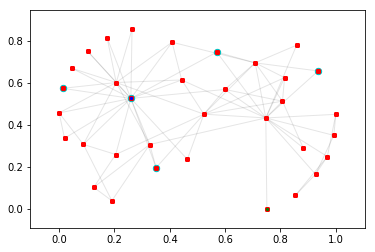

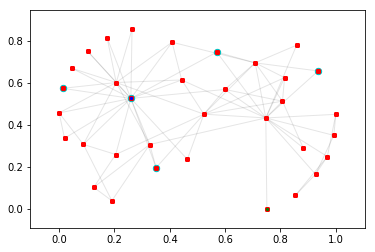

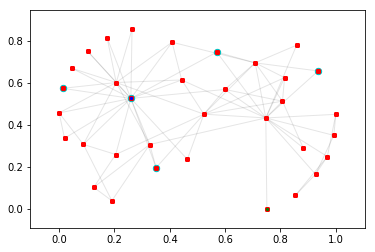

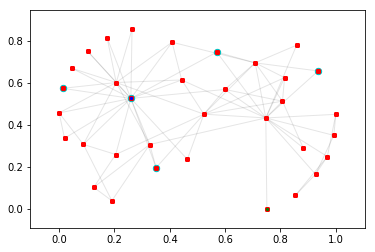

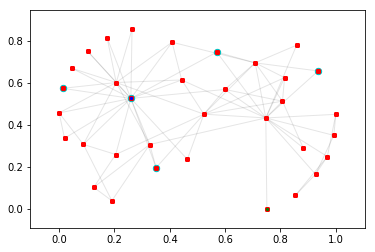

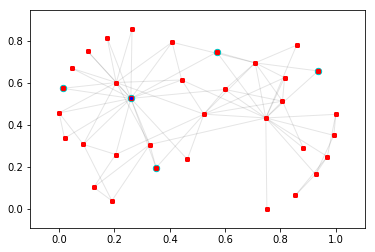

DONE


In [21]:
figureList = list()
# Parameters definition
numRumors = 10
maxThreshold = 1
numMonitors = 5
propagProba = 0.2
numNodes = 500
linkProba = 0.2
monitorTrigger = list()
numStep = 100


j=0

Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)

fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
#fig1.savefig('./TestFigs/figT'+str(j)+'.png')

print("Starting infection")
infections = [[] for n in range(numRumors)]

infected = getInfectedList(Graph,numRumors)

while(not isAllInfected(Graph,numRumors)):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)

    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, myMonitors=monitorsList,myIndex=j)
    
print("DONE")

In [7]:
sets = list()
monitorTrigger2 = sorted(monitorTrigger, key=lambda x : (x[0], x[2]))
for i in range(int(len(monitorTrigger2)/numRumors)):
    set1 =findSet(Graph,monitorTrigger2[i*numRumors][0],monitorTrigger2[i*numRumors][2])
    sets.append(set(set1))
    
source = set.intersection(*sets)

try:
    print("Identified Source = ",list(source)[0],"\nReal Source = ",rumorSources[0])
except:
    print("Real Source = ",rumorSources[0])
    print("No sources identified")
    #printMonitorTrig(monitorTrigger)
    #print('\n\nDifferent sets')
    #print(*sets,sep='\n')

Real Source =  3
No sources identified


Real Source =  3
Detected Source =  [0, 1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 16, 17, 19, 31]


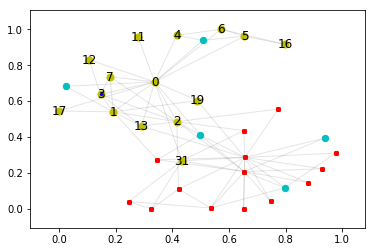

In [8]:
from networkUtils import drawColoredGraph2

setList = []


for i in monitorTrigger:
    nodeSet = findSet2(Graph,i[0],i[2])
    setList.append(nodeSet)
    
finalSet = set.intersection(*setList)
print("Real Source = ",rumorSources[0])
print("Detected Source = ",list(finalSet))
finalList = list(finalSet)


drawColoredGraph2(Graph,Pos,numRumors,rumorSources,monitorsList,finalList)
#fig.savefig('./TestFigs/figEND'+'png')

In [9]:
degCent = nx.degree_centrality(Graph)

maxDeg = -1
maxNode = -1

for node in finalList :
    if degCent[node] > maxDeg :
        maxDeg = degCent[node]
        maxNode = node
    #print(node,' : ',degCent[node])

print('\n Max degree Centrality : \n node ',maxNode,' : ', maxDeg)


 Max degree Centrality : 
 node  0  :  0.48484848484848486


In [10]:
print('Monitors : ',monitorsList,'\n\n')

pathList = list()

for source in finalList :
    print('\n source : ',source,': \n')
    for target in monitorsList :
        print(target,' : ',len(nx.shortest_path(Graph,source,target))-1)

Monitors :  [10, 21, 8, 29, 22] 



 source :  0 : 

10  :  1
21  :  1
8  :  1
29  :  3
22  :  3

 source :  1 : 

10  :  2
21  :  1
8  :  2
29  :  3
22  :  3

 source :  2 : 

10  :  2
21  :  2
8  :  1
29  :  2
22  :  2

 source :  3 : 

10  :  2
21  :  2
8  :  2
29  :  3
22  :  3

 source :  4 : 

10  :  1
21  :  2
8  :  2
29  :  4
22  :  4

 source :  5 : 

10  :  1
21  :  2
8  :  2
29  :  4
22  :  4

 source :  6 : 

10  :  2
21  :  2
8  :  2
29  :  4
22  :  4

 source :  7 : 

10  :  2
21  :  2
8  :  2
29  :  3
22  :  3

 source :  11 : 

10  :  2
21  :  2
8  :  2
29  :  4
22  :  4

 source :  12 : 

10  :  2
21  :  2
8  :  2
29  :  4
22  :  4

 source :  13 : 

10  :  2
21  :  2
8  :  2
29  :  2
22  :  2

 source :  16 : 

10  :  2
21  :  3
8  :  3
29  :  5
22  :  5

 source :  17 : 

10  :  2
21  :  2
8  :  2
29  :  4
22  :  4

 source :  19 : 

10  :  2
21  :  2
8  :  2
29  :  2
22  :  2

 source :  31 : 

10  :  2
21  :  2
8  :  2
29  :  2
22  :  2


In [11]:
for i in range(int(len(monitorTrigger2)/numRumors)):
    print('Monitor node : ', monitorTrigger2[i*numRumors][0],' path : ',monitorTrigger2[i*numRumors][2])

Monitor node :  8  path :  4
Monitor node :  10  path :  2
Monitor node :  21  path :  4
Monitor node :  22  path :  6
Monitor node :  29  path :  5


In [12]:
#Work on the markov chain like propag
A = nx.adjacency_matrix(Graph).todense()

#refactor A w/ the correct probability

A = A*propagProba/4
I = np.identity(A.shape[0])*(1-propagProba)
A = A+I

In [13]:
print(monitorTrigger2)

[(8, 3, 4), (8, 5, 4), (8, 7, 4), (8, 4, 5), (8, 6, 5), (8, 1, 6), (8, 8, 6), (8, 9, 6), (8, 10, 6), (8, 2, 8), (10, 9, 2), (10, 2, 5), (10, 7, 5), (10, 3, 6), (10, 6, 6), (10, 5, 8), (10, 10, 9), (10, 4, 10), (10, 1, 12), (10, 8, 12), (21, 2, 4), (21, 3, 4), (21, 9, 4), (21, 7, 5), (21, 1, 6), (21, 5, 6), (21, 6, 6), (21, 4, 7), (21, 8, 7), (21, 10, 15), (22, 3, 6), (22, 7, 6), (22, 10, 6), (22, 4, 7), (22, 6, 7), (22, 8, 8), (22, 1, 9), (22, 9, 9), (22, 2, 10), (22, 5, 11), (29, 3, 5), (29, 7, 5), (29, 4, 6), (29, 6, 6), (29, 10, 6), (29, 1, 7), (29, 5, 7), (29, 9, 8), (29, 8, 9), (29, 2, 10)]


In [14]:
def propaProd(myPropagP,myDist,myStep):
    if myDist > myStep :
        return 0
    
    proba = 1-myPropagP
    Res = 1
    exponent = myStep
    for i in range(myStep-myDist+1,myStep+1):
        Res *= (1 - pow(proba,exponent))
        #print("1 - ",proba,"^",exponent)
        exponent -= 1
    return Res

In [15]:
sourceDict ={}

for source in finalList:
    sourceDict[source] = 0


for mInfo in monitorTrigger2:
    print("Monitor ",mInfo[0]," :")
    for source in finalList:
        prb = propaProd(propagProba,len(nx.shortest_path(Graph,source,mInfo[0]))-1,mInfo[2])
        sourceDict[source]+=prb
        print("Infected by node ",source," with proba : ",prb)

Monitor  8  :
Infected by node  0  with proba :  0.5903999999999999
Infected by node  1  with proba :  0.2881151999999999
Infected by node  2  with proba :  0.5903999999999999
Infected by node  3  with proba :  0.2881151999999999
Infected by node  4  with proba :  0.2881151999999999
Infected by node  5  with proba :  0.2881151999999999
Infected by node  6  with proba :  0.2881151999999999
Infected by node  7  with proba :  0.2881151999999999
Infected by node  11  with proba :  0.2881151999999999
Infected by node  12  with proba :  0.2881151999999999
Infected by node  13  with proba :  0.2881151999999999
Infected by node  16  with proba :  0.10372147199999993
Infected by node  17  with proba :  0.2881151999999999
Infected by node  19  with proba :  0.2881151999999999
Infected by node  31  with proba :  0.2881151999999999
Monitor  8  :
Infected by node  0  with proba :  0.5903999999999999
Infected by node  1  with proba :  0.2881151999999999
Infected by node  2  with proba :  0.590399999

0.2928828842311679
Infected by node  2  with proba :  0.49607534591999985
Infected by node  3  with proba :  0.2928828842311679
Infected by node  4  with proba :  0.14292684750480988
Infected by node  5  with proba :  0.14292684750480988
Infected by node  6  with proba :  0.14292684750480988
Infected by node  7  with proba :  0.2928828842311679
Infected by node  11  with proba :  0.14292684750480988
Infected by node  12  with proba :  0.14292684750480988
Infected by node  13  with proba :  0.49607534591999985
Infected by node  16  with proba :  0.05145366510173154
Infected by node  17  with proba :  0.14292684750480988
Infected by node  19  with proba :  0.49607534591999985
Infected by node  31  with proba :  0.49607534591999985
Monitor  22  :
Infected by node  0  with proba :  0.2928828842311679
Infected by node  1  with proba :  0.2928828842311679
Infected by node  2  with proba :  0.49607534591999985
Infected by node  3  with proba :  0.2928828842311679
Infected by node  4  with pro

In [16]:
scoreList = sorted(sourceDict,key=sourceDict.__getitem__,reverse=True)
print(sourceDict)
print(scoreList)
print(scoreList.index(*rumorSources)+1)
print("number of candidates : ",len(scoreList))

{0: 30.119983303801316, 1: 25.598801088810596, 2: 29.390616177950722, 3: 23.234452577286252, 4: 22.21223270768201, 5: 22.21223270768201, 6: 20.290322880922457, 7: 23.234452577286252, 11: 20.290322880922457, 12: 20.290322880922457, 13: 26.79134378971955, 16: 14.342116005788439, 17: 20.290322880922457, 19: 26.79134378971955, 31: 26.79134378971955}
[0, 2, 13, 19, 31, 1, 3, 7, 4, 5, 6, 11, 12, 17, 16]
7
number of candidates :  15


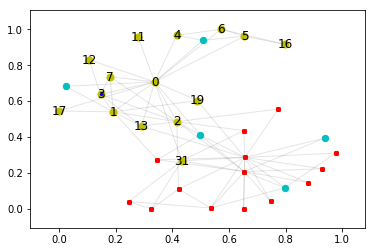

In [17]:
fig = drawColoredGraph2(Graph,Pos,numRumors,rumorSources,monitorsList,finalList)

In [18]:
print("Distance between first candidate and real source : ",len(nx.shortest_path(Graph,rumorSources[0],scoreList[0]))-1)

Distance between first candidate and real source :  1
